# 1.5   Робастная сглаживающая аппроксимация

In [135]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Функции вычисления коэффициентов разложения

In [136]:
# x(n), y(n) - массив данных
# m - степень полинома (количество базисных функций - 1)

def SqLeast (x, y, m):
    global G, Phi
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    return a

def SqLeastRobust (x, y, m):
    
    # robust polinomial approximation (Huber metrics)
    # x, y - data set
    # m - polinom degree 
    
    global G, Phi
    n = len(x)
    yr = np.eye (n)
    E = np.eye (n)
    
    Phi = np.zeros ((n,m+1))
    
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    
    # initial stage
    
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    dist = 1.5
    
    yr = y @ E
    
    
    eps = 0.001
    
    # итерационный процесс
    
    print ()
    print ('Итерационный процесс')
    print ()
    
    for it in range (0, 10):
    
        ait = a  
          
        PhiA = Phi @ a
    
        res = Phi @ a - yr   

        print("yr:", yr) 
        print("PhiA:", PhiA) 
        print("res:", res)      
          
        for i in range (0, n):
            #print ('it*', it,  y[10], PhiA[i]-dist)
            if (res[i]>dist):
                yr[i] = PhiA[i]-dist
                #print ('it+', it,  y[10], PhiA[i]-dist)
            if (res[i]<-dist):
                yr[i] = PhiA[i]+dist
                #print ('it-', it,  y[10], PhiA[i]-dist)
                    
        z = PhiT @ yr
        a = np.linalg.solve(G, z)
        
        eit = a - ait
        epsit = (sum(eit**2))**0.5/len(eit)
        
        print ('iteration', it, a, epsit)
        
        if (epsit<=eps):
            print ()
            break 
                
    return a


def BasicFunctions (num, x):
    PhiFun = x**num
    return PhiFun

### Функция вычисления погрешности аппроксимации

In [137]:
def AppError (x,y,Coefs):
    
    PolynomValue = np.zeros(len(x))
    for i in range (0, m+1):
        PolynomValue += Coefs[i]*x**i
   
    y_av = np.sum(y)/len(x)
    y_disp = np.sum((y-y_av)**2)/len(x)
    
    ResLocal = (y - PolynomValue)
    ResLocalRel = ResLocal/y_disp**0.5
    ResGlobal = (np.sum ((ResLocal)**2)/len(x))**0.5
    ResGlobalRel = ResGlobal / y_disp**0.5
    
    yv_disp = np.sum((PolynomValue-y_av)**2)/len(x)
    
    R2 = yv_disp/y_disp
        
    return ResLocal, ResLocalRel, ResGlobal, ResGlobalRel

def R2 (x, y, Coefs):
    PolynomValue = np.zeros(len(x))
    
    for i in range (0, m+1):
        PolynomValue += Coefs[i]*x**i
   
    y_av = np.sum(y)/len(x)
    y_disp = np.sum((y-y_av)**2)/len(x)    
      
    yv_disp = np.sum((PolynomValue-y_av)**2)/len(x)
    
    R2 = yv_disp/y_disp
        
    return R2

### Формирование набора данных

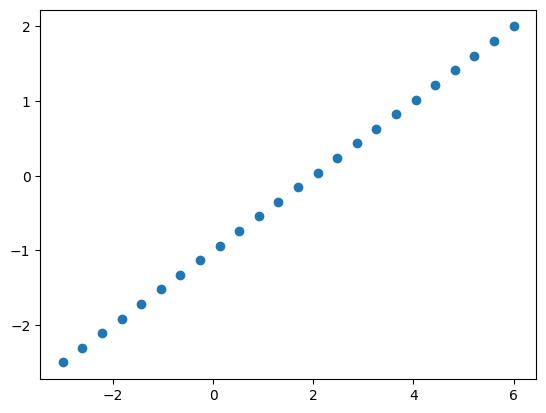

In [138]:
xleft = -3
xright = 6
n = 24
x = np.linspace(xleft,xright,n)
yf = np.zeros ((n))
y = np.zeros ((n))
yf = -1. + 0.5*x
plt.plot (x,yf, 'o')

### Зашумление данных

15.0


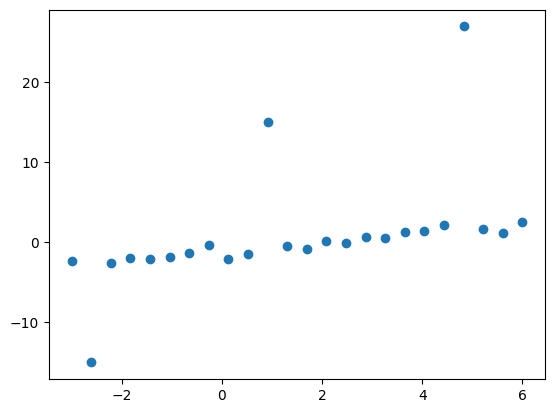

In [ ]:
Delta = 0.5 * np.random.randn(len(x))
y = yf + Delta
y_av = np.sum(y)/len(x)

y [10] = 15.
y [20] = 27.
y [1] = -15

plt.plot (x, y, 'o')

print (y[10])

### Построение аппроксимационного полинома 

Коэффициенты [-1.00256113  1.27779713]
Числа обусловленности матриц G и Phi 13.200833358126788 3.633295110244526


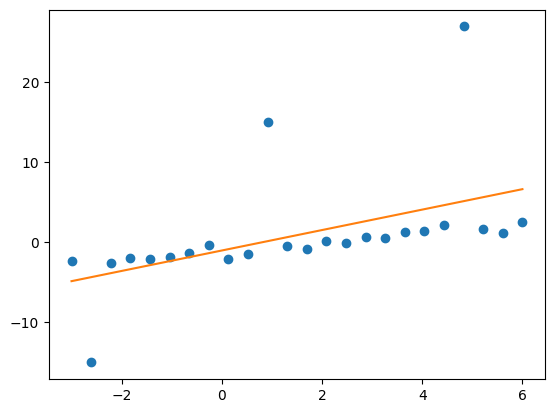

In [140]:
m = 1

PolynomCoefs = SqLeast (x, y, m)
print ('Коэффициенты', PolynomCoefs)

cond = np.linalg.cond (G)
condPhi = np.linalg.cond (Phi)
EigG = np.linalg.eigvals (G)
print ('Числа обусловленности матриц G и Phi', cond, condPhi)

PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
    
plt.plot (x, y, 'o')
plt.plot (x, PolynomValue)

### Робастная аппроксимация

y: [ -2.32693886 -15.          -2.54194244  -1.94772153  -2.01650035
  -1.80254601  -1.31582679  -0.27531991  -2.08012497  -1.47554379
  15.          -0.39819929  -0.77895169   0.18372206  -0.06216589
   0.72771567   0.60190098   1.35999145   1.4308803    2.17164018
  27.           1.66629922   1.24083341   2.57802757]

Итерационный процесс

yr: [ -2.32693886 -15.          -2.54194244  -1.94772153  -2.01650035
  -1.80254601  -1.31582679  -0.27531991  -2.08012497  -1.47554379
  15.          -0.39819929  -0.77895169   0.18372206  -0.06216589
   0.72771567   0.60190098   1.35999145   1.4308803    2.17164018
  27.           1.66629922   1.24083341   2.57802757]
PhiA: [-4.83595251 -4.33594494 -3.83593737 -3.3359298  -2.83592223 -2.33591466
 -1.83590709 -1.33589951 -0.83589194 -0.33588437  0.1641232   0.66413077
  1.16413834  1.66414591  2.16415348  2.66416105  3.16416862  3.6641762
  4.16418377  4.66419134  5.16419891  5.66420648  6.16421405  6.66422162]
res: [ -2.50901365  10.66405506  -1.

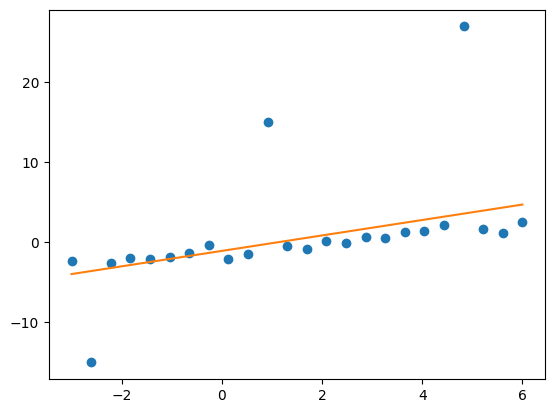

In [141]:
m = 1
print("y:", y)

PolynomCoefs = SqLeastRobust (x, y, m)
print ('Коэффициенты', PolynomCoefs)

cond = np.linalg.cond (G)
condPhi = np.linalg.cond (Phi)
EigG = np.linalg.eigvals (G)
print ('Числа обусловленности матриц G и Phi', cond, condPhi)

PolynomValue = np.zeros(len(x))

for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
    
plt.plot (x, y, 'o')
plt.plot (x, PolynomValue)

## Домашняя работа

### Метрики Хьюбера и Tukey

In [142]:
def SqLeastCust(x, y, m, method='huber', delta=1.0, tol=1e-6, max_iter=100):
    global G, Phi
    n = len(x)
    Phi = np.zeros((n, m + 1))
    for k in range(0, m + 1):
        Phi[:, k] = BasicFunctions(k, x)
    PhiT = Phi.T

    # база итерационного процесса
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    for _ in range(max_iter):
        s = y - Phi @ a  # остаток, ошибка апроксимации
        if method == 'huber':
            weights = np.where(np.abs(s) <= delta, 0.5, delta / np.abs(s) - delta*delta/(2*s*s))
        elif method == 'tukey':
             weights = np.where(np.abs(s) <= delta, 1, (delta*delta)/(s*s))
        else:
            raise ValueError("Unknown method: choose 'huber' or 'tukey'")
        
        W = np.diag(weights)  # матрица весов
        G_weighted = PhiT @ W @ Phi
        z_weighted = PhiT @ W @ y
        a_new = np.linalg.solve(G_weighted, z_weighted)
        
        # Проверка на сходимость
        if np.linalg.norm(a_new - a) < tol:
            break
        a = a_new
    
    return a


y: [ -2.32693886 -15.          -2.54194244  -1.94772153  -2.01650035
  -1.80254601  -1.31582679  -0.27531991  -2.08012497  -1.47554379
  15.          -0.39819929  -0.77895169   0.18372206  -0.06216589
   0.72771567   0.60190098   1.35999145   1.4308803    2.17164018
  27.           1.66629922   1.24083341   2.57802757]
Коэффициенты [-1.16230566  0.650159  ]
Числа обусловленности матриц G и Phi 13.200833358126788 3.633295110244526


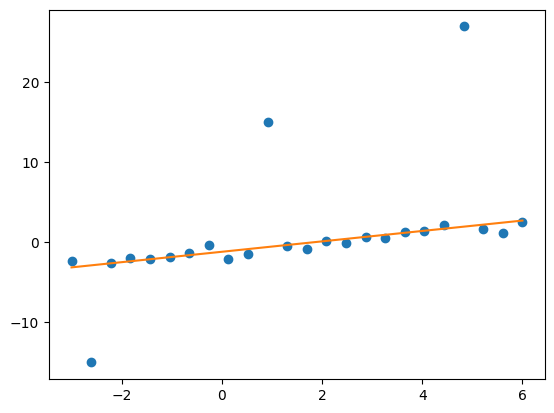

In [143]:
m = 1
print("y:", y)

PolynomCoefs = SqLeastCust(x, y, m, method='huber')
print ('Коэффициенты', PolynomCoefs)

cond = np.linalg.cond (G)
condPhi = np.linalg.cond (Phi)
EigG = np.linalg.eigvals (G)
print ('Числа обусловленности матриц G и Phi', cond, condPhi)

PolynomValue = np.zeros(len(x))

for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
    
plt.plot (x, y, 'o')
plt.plot (x, PolynomValue)

y: [ -2.32693886 -15.          -2.54194244  -1.94772153  -2.01650035
  -1.80254601  -1.31582679  -0.27531991  -2.08012497  -1.47554379
  15.          -0.39819929  -0.77895169   0.18372206  -0.06216589
   0.72771567   0.60190098   1.35999145   1.4308803    2.17164018
  27.           1.66629922   1.24083341   2.57802757]
Коэффициенты [-1.11615045  0.56205595]
Числа обусловленности матриц G и Phi 13.200833358126788 3.633295110244526


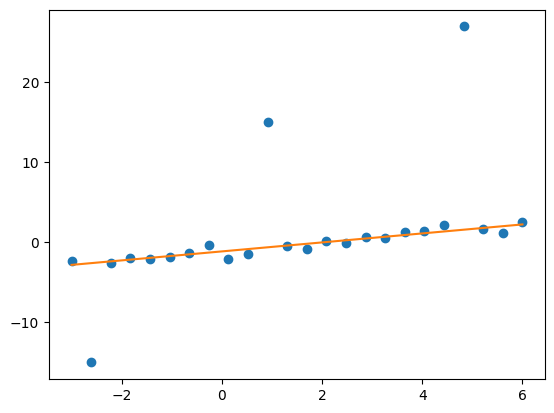

In [144]:
m = 1
print("y:", y)

PolynomCoefs = SqLeastCust(x, y, m, method='tukey')
print ('Коэффициенты', PolynomCoefs)

cond = np.linalg.cond (G)
condPhi = np.linalg.cond (Phi)
EigG = np.linalg.eigvals (G)
print ('Числа обусловленности матриц G и Phi', cond, condPhi)

PolynomValue = np.zeros(len(x))

for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
    
plt.plot (x, y, 'o')
plt.plot (x, PolynomValue)